In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.append("../..") # include base dir

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-deai2iz4 because the default path (/home/tsr42/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Student T Distribution

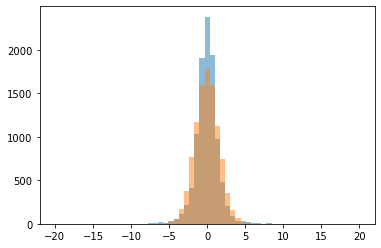

In [2]:
bigSample = np.random.standard_t(3.5, size=(10000))
bins = np.linspace(-20, 20, 60)
plt.hist(bigSample,bins=bins, alpha=0.5);
plt.hist(np.random.normal(size=(10000)) * np.sqrt(np.var(bigSample)),bins=bins, alpha=0.5);

In [3]:
# Dataset is a mimic of the toy dataset presented in 
# "Independent Subspace Analysis for Unsupervised Learning of Disentangled Representations"
N = 100000
trueLatents = np.random.standard_t(3.5, size=(N,3))
stdest = np.sqrt(np.var(trueLatents))
fakeLatents = np.random.normal(size=(N,3)) * stdest
W = np.array([[1              ,0              ],
              [np.cos(np.pi/6),np.sin(np.pi/6)],
              [np.cos(np.pi/3),np.sin(np.pi/3)]
             ]).T
dataset = (W @ trueLatents.T).T
fakeDataset = (W @ fakeLatents.T).T

In [4]:
covar = W @ (np.eye(3) * stdest**2) @ W.T
print(np.sum(np.diag(covar)))
print(3 * stdest**2)

6.9593949923386855
6.959394992338685


## Diversion on multivariate gaussians

In [5]:
#E(X[:,0]**2) = 4.68
#E(X[:,1]**2) = 2.34
#E(X[:,0]*X[:,1]) = 2.03

# if that was generated by a rotation of a diagonal, we'd have
#E(X[:,0]**2) = s0**2 * cos(\theta)**2 + s1**2 * sin(\theta)**2
#E(X[:,1]**2) = s1**2 * cos(\theta)**2 + s0**2 * sin(\theta)**2
#E(X[:,0]*E[:,1]) = (s0^2 - s1^2) * cos(\theta) * sin(\theta)

print(np.linalg.eig(covar))
np.cos(np.pi/6)

(array([5.79949583, 1.15989917]), array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]]))


0.8660254037844387

# Plot

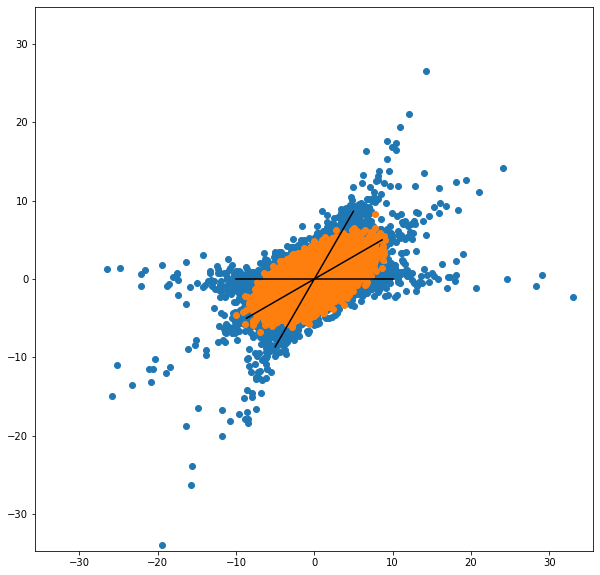

In [9]:
f = plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0],dataset[:,1])
plt.scatter(fakeDataset[:,0],fakeDataset[:,1])
plt.axis("equal")
lim = np.max(np.abs(dataset)) * 1.05
for i in range(3):
    plt.plot((-W[0,i]*10,W[0,i]*10),(-W[1,i]*10,W[1,i]*10), color="black")
plt.ylim((-lim,lim))
plt.xlim((-lim,lim));